# Linear Regression "by hand"

## Data Points

We are collecting data on the total number of sales per day for some business. We've got three data points in the format:

(day, total number of sales(in hundreds))

> (1, 1) , (2, 2) , (3, 2)

Let us display this basic data in the form of a Pandas DataFrame.

In [1]:
import pandas as pd

df = pd.DataFrame()
df['day'] = [1,2,3]
df['sales'] = [1,2,2]

df.head()

,day,sales
0,1,1
1,2,2
2,3,2


Let us plot the data using a scatter plot.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['day'], df['sales'])
plt.xticks(df['day'])
plt.yticks(df['sales'])
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Scatter Plot of Day vs Sales')
plt.show()

<Figure size 640x480 with 1 Axes>

The purpose of linear regression is to fit a straight line that best describes the relationship between day and sales.

We assume that there is an underlying relationship that maps “days” uniquely to “number of sales”, that can be written in the function form as an equation of the straight line i.e.

$$ y = mx + c $$

where $c$ is the intercept of the line and $m$ denotes the slope.

In our case, we can write
$$\text{sales} = c + m*\text{days} $$

where $y$ is the number of sales per day and $x$ represents the day and $c$ (intercept) and $m$ (slope) are the regression coefficients we are looking for.

Using our three data points, we can write:

> $c + m*1 = 1$

> $c + m*2 = 2$

> $c + m*3 = 2$

We can see that our data points do not lie on a line. As such we are after the best approximation.

## Linear Algebra 

### Solving our problem 'by hand'

We have 
$$ X =  \left[{\begin{array}{cc}
   1 & 1 \\
   1 & 2 \\
   1 & 3 \\
  \end{array}} \right]
,y =\left[ {\begin{array}{c}
    1 \\
    2 \\
    2 \\
  \end{array} } \right]
, b =  \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right]
$$

And
$$
    \left[ {\begin{array}{c}
    1 \\
    2 \\
    2 \\
  \end{array} } \right] =
    \left[ {\begin{array}{cc}
   1 & 1 \\
   1 & 2 \\
   1 & 3 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right]
$$

Let us solve for $c$ and $m$.

We first multiply both sides by $X^T$ to get a square invertible matrix on the RHS.

$$ 
X^T = \left[ {\begin{array}{c}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    \end{array} } \right]
$$

So we have
$$
\left[ {\begin{array}{c}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    \end{array} } \right]
\left[ {\begin{array}{c}
    1 \\
    2 \\
    2 \\
  \end{array} } \right] =
\left[ {\begin{array}{c}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    \end{array} } \right]  
    \left[ {\begin{array}{cc}
   1 & 1 \\
   1 & 2 \\
   1 & 3 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right]    
$$

$$
\left[ {\begin{array}{c}
    5 \\
    11  \\
    \end{array} } \right]
 =
\left[ {\begin{array}{c}
    3 & 6  \\
    6 & 14  \\
    \end{array} } \right]  
   \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right]    
$$

We can now calculate the inverse as we have a square invertible matrix $X^TX$.

$$ (X^TX)^{-1} = 
\left[ {\begin{array}{c}
    3 & 6  \\
    6 & 14  \\
    \end{array} } \right]^{-1} =
    \frac{1}{6}
\left[ {\begin{array}{c}
    14 & -6  \\
    -6 & 3  \\
    \end{array} } \right]   
$$

We multiply both sides by $(X^TX)^{-1}$

$$
\frac{1}{6}
\left[ {\begin{array}{c}
    14 & -6  \\
    -6 & 3  \\
\end{array} } \right]
\left[ {\begin{array}{c}
    5 \\
    11  \\
    \end{array} } \right]=
\frac{1}{6}
\left[ {\begin{array}{c}
    14 & -6  \\
    -6 & 3  \\
\end{array} } \right]
\left[ {\begin{array}{c}
    3 & 6  \\
    6 & 14  \\
    \end{array} } \right]  
   \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right]    
$$


And as $(X^TX)^{-1}(X^TX) = Id$, we can simplify the RHS giving

$$
\frac{1}{6}
\left[ {\begin{array}{c}
    14 & -6  \\
    -6 & 3  \\
\end{array} } \right]
\left[ {\begin{array}{c}
    5 \\
    11  \\
    \end{array} } \right]=
   \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right]      
$$

Finally we can solve for $c$ and $m$,

$$
\left[ {\begin{array}{c}
    \frac{2}{3} \\
    \frac{1}{2}  \\
    \end{array} } \right]=
   \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right] 
$$

So the line that best fits our data is 
$$ y = \frac{1}{2}x + \frac{2}{3} $$

### Theory

We can express our problem as a linear system as follows:


$$
    \left[ {\begin{array}{cc}
   1 & 1 \\
   1 & 2 \\
   1 & 3 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right] =
    \left[ {\begin{array}{c}
    1 \\
    2 \\
    2 \\
  \end{array} } \right] 
$$

The column of ones in the first matrix refers to the intercept ($c$) from $mx+c$. If you don't include this constant, then the function is constrained to the origin (0,0), which would strongly limit the types of relationships the model could describe.

In above , we are hoping that there is some linear combination of the columns of the first matrix that gives us our vector of observed values (the vector with values 1,2,2).

Unfortunately, we already know that this vector does not fit our model perfectly Every line we draw will have some value of error $e$ associated with it. 

**The goal is to make $e$ as small as possible**.

A common measure to find and minimize the value of this error is called *Ordinary Least Squares*. 

This says that our dependent variable, is composed of a linear part and error.
In matrix terms, we can write:

$ y = \boldsymbol{X} b + e $

This says to get y (sales), multiply each $\boldsymbol{X}$ by the appropriate vector b (unknown parameters, the vector version of $m$ and $c$), then add an error term. We create a matrix $\boldsymbol{X}$ , which has an extra column of ones in it for the intercept.

### Derivation of the formula for b

We are looking to solve 

$ y = \boldsymbol{X} b$

First we will make X into a nice square, symmetric matrix by multiplying both sides of the equation by $\boldsymbol{X}^T$ :

$\boldsymbol{X}^T y = \boldsymbol{X}^T \boldsymbol{X}b $

And now we have a square matrix that with any luck has an inverse, which we will call $(\boldsymbol{X}^T\boldsymbol{X})^{-1}$. Multiply both sides by this inverse, and we have

$(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T y =(\boldsymbol{X}^T\boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{X}b $


It turns out that a matrix multiplied by its inverse is the identity matrix $(\boldsymbol{X}^{-1}\boldsymbol{X})= I$:

$(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T y =I b $


And you know that $Ib= b$ So if you want to solve for $b$ (that is, remember, equivalent to finding the values $m$ and $c$ in this case), you find that:

$ b= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T y $

>Using linear regression is just trying to solve  $ y = \boldsymbol{X} b$. But if any of the observed points deviate from the model, you can't find a direct solution. To find a solution, you can multiply both sides by the transpose of  𝑋 . The transpose of  𝑋  times  𝑋  will always allow us to solve for unknown variables.

### Check using Numpy

In [3]:
import numpy as np

X = np.array([[1, 1],[1, 2],[1, 3]])
y = np.array([1, 2, 2])

# Take Transpose
Xt = X.T
# Take dot product of X Transpose with X
XtX = Xt.dot(X)
# Take inverse
XtX_inv = np.linalg.inv(XtX)

# Take dot product of X Transpose with y
Xty = Xt.dot(y)

# Take dot product of both terms
b = XtX_inv.dot(Xty) 

b

array([0.66666667, 0.5       ])

This tells us that the optimal values are $c = 0.666$ and $m = 0.5$.

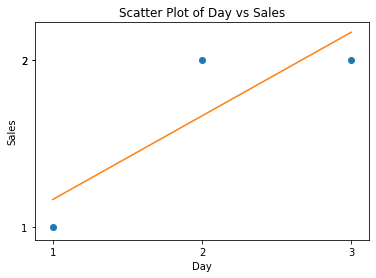

In [4]:
plt.plot(X, b[0] + (b[1] * X), '-')
plt.scatter(df['day'], df['sales'])
plt.xticks(df['day'])
plt.yticks(df['sales'])
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Scatter Plot of Day vs Sales')
plt.show()

### Check using Sklearn

This is obviously overkill, but let's see that it returns the same values.

In [9]:
from sklearn.linear_model import LinearRegression

# instatiate class
linreg = LinearRegression()

# Define X and y
X = np.array(df['day']).reshape(-1,1)
y = df['sales']

# fit model 
model = linreg.fit(X,y)

In [12]:
model.coef_

array([0.5])

In [13]:
model.intercept_

0.6666666666666672

## Gradient Descent

Gradient Descent finds the optimal values of $m$ and $c$ to fit a line to the data.

### Gradient Descent to find intercept

We will first show how gradient descent can be used to find the optimal intercept $c$. So we will use the value for $m$ that we found above.

$$
sales = c + 0.5*days
$$

To begin, choose a random value for $c$, which gives gradient descent something to improve upon. Here we will start with $c = 0$.

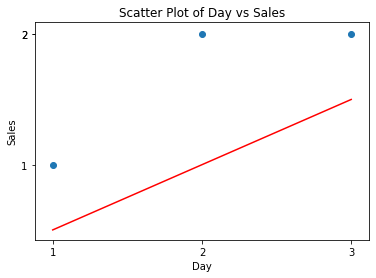

In [16]:
# Initial line
plt.plot(X, 0.5*X, '-', color = 'red')

# Data points
plt.scatter(df['day'], df['sales'])

plt.xticks(df['day'])
plt.yticks(df['sales'])
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Scatter Plot of Day vs Sales')
plt.show()

We will evaluate how well this line fits the data using the Residual Sum of Squares

$$ RSS = \sum_{i =1}^{n} (y_i - \hat{y})^2 $$

Here as we have three data points, we can explicitly write

$$ RSS = (y_1 - (m*x_1 + c))^2 + (y_2 - (m*x_2 + c))^2 + (y_3 - (m*x_3 + c))^2$$

Substituting $m=0.5$ and $c=0$, we get
$$ RSS = (y_1 - 0.5*x_1)^2 + (y_2 - 0.5*x_2)^2 + (y_3 - 0.5*x_3)^2$$ 

And substituting our values for $x_i$ and $y_i$ gives us
$$ RSS = (1 - 0.5*1)^2 + (2 - 0.5*2)^2 + (2 - 0.5*3)^2 = 1.5 $$

This gives us one value for RSS when $c = 0$. By changing the value of $c$ we can obtain a curve.

In [21]:
# def function for RSS dependent on c
def RSS_c(c):
    return (1 - (0.5*1 + c))**2 + (2 - (0.5*2 + c))**2 + (2 - (0.5*3 + c))**2 

In [22]:
RSS_c(0.5)

0.25

So when $c = 0.5$, we see that $RSS = 0.25$ which is an improvement.

Let us plot $RSS$ for different values of $c$.

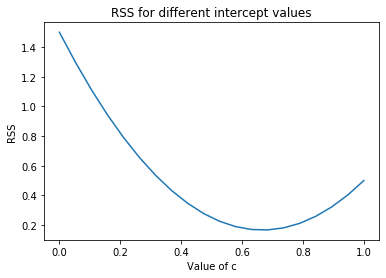

In [30]:
c_vals = np.linspace(0,1,20)
plt.plot(c_vals, RSS_c(c_vals))
plt.title('RSS for different intercept values')
plt.xlabel('Value of c')
plt.ylabel('RSS')
plt.show()

Gradient descent will help find optimal value for $c$ by decending along the cost curve and finding the value where RSS is lowest. It will perform fewer calculations when far from optimal value and more when close.

This is the function we have for RSS

$$
RSS(c) = (1 - (0.5*1 + c))^2 + (2 - (0.5*2 + c))^2 + (2 - (0.5*3 + c))^2 
$$

We can take the derrivative of this function to find the slope of the tangent line at any point on the curve. Let's calculate this using the Chain Rule.

$$
\frac{d}{d c} RSS = - 2(1 - (0.5*1 + c)) - 2(2 - (0.5*2 + c)) - 2(2 - (0.5*3 + c))
$$

Now that we have the derrivative, gradient descent will use it to find where RSS is lowest.

**Note** if we were using Least Squares, we would set the derrivative to 0 to find the best solution.

As a check if we were to solve 
$$ - 2(1 - (0.5*1 + c)) - 2(2 - (0.5*2 + c)) - 2(2 - (0.5*3 + c)) = 0$$

We would get
$$ - 2 + 1 + 2c - 4 + 2 + 2c - 4 + 3 + 2 c = 0 $$
$$ c = 2/3 $$

In contrast, gradient descent works by taking steps until the optimal value is found.

As such gradient descent is very useful when one cannot solve derivative = 0.

Coming back to the derrivative, we can see that for $c = 0$, 
$$
\frac{d}{d c} RSS = - 2(1 - (0.5*1 + c)) - 2(2 - (0.5*2 + c)) - 2(2 - (0.5*3 + c))
$$
$$
\frac{d}{d c} RSS = - 2(1 - 0.5*1) - 2(2 - 0.5*2) - 2(2 - 0.5*3)
$$
$$
\frac{d}{d c} RSS = -4
$$
So when $c = 0$ the slope of the curve is -4.
The closer we get to the optimal value, the closer the slope will get to 0.

To take steps towards the optimal value, we define the step size.
$$
\textbf{Step size} = \text{slope * learning rate}
$$
The learning rate is a small number, let us set it at 0.1

So when $c = 0$, we have **step size** = -4 * 0.1 = -0.4

The step size allows us to determine the next intercept value 
$$
\textbf{new_c} = \text{c - step size}
$$

So for us, new_c = 0 + 0.4 = 0.4

Using our derrivative formula for $c = 0.4$, we get a slope of
$$
\frac{d}{d c} RSS = - 2(1 - (0.5*1 + 0.4)) - 2(2 - (0.5*2 + 0.4)) - 2(2 - (0.5*3 + 0.4))
$$
$$
\frac{d}{d c} RSS = -1.6
$$

Again we can calculate step size and the new intercept value. 

When $c = 0.4$, we have **step size** = -1.6 * 0.1 = -0.16 and new_c = 0.4 + 0.16 = 0.56

We can compare RSS for when $c=0$ starting point and $c = 0.56$ where we are now.

In [47]:
RSS_c(0)

1.5

In [48]:
RSS_c(0.56)

0.2008

RSS is getting smaller. Let us keep going.

Using our derrivative formula for $c = 0.56$, we get a slope of
$$
\frac{d}{d c} RSS = - 2(1 - (0.5*1 + 0.56)) - 2(2 - (0.5*2 + 0.56)) - 2(2 - (0.5*3 + 0.56))
$$
$$
\frac{d}{d c} RSS = -0.64
$$

When $c = 0.56$, we have **step size** = -0.64 * 0.1 = -0.064 and new_c = 0.56 + 0.064 = 0.624

And again.

Using our derrivative formula for $c = 0.624$, we get a slope of
$$
\frac{d}{d c} RSS = - 2(1 - (0.5*1 + 0.624)) - 2(2 - (0.5*2 + 0.624)) - 2(2 - (0.5*3 + 0.624))
$$
$$
\frac{d}{d c} RSS = -0.256
$$

When $c = 0.624$, we have **step size** = -0.256 * 0.1 = -0.0256 and new_c = 0.624 + -0.0256 = 0.6496

And one last time.

Using our derrivative formula for $c = 0.6496$, we get a slope of
$$
\frac{d}{d c} RSS = - 2(1 - (0.5*1 + 0.6496)) - 2(2 - (0.5*2 + 0.6496)) - 2(2 - (0.5*3 + 0.6496))
$$
$$
\frac{d}{d c} RSS = -0.1024
$$

When $c = 0.6496$, we have **step size** = -0.1024 * 0.1 = -0.01024 and new_c = 0.624 + -0.0256 = 0.65984

Using gradient descent has given us a value of $c$ equal to $0.66$ same as with least squares.

**Note**: Gradient descent stops when the step size is very close to 0. We can set a threshold to stop at, usually around 0.001. Gradient descent also has a fixed number of steps before stopping, usually set at 1,000 steps.

## Two Predictors

### Ridge Regression

$$ \sum_{i=1}^n(y_i - (m_1x_{i1} + m_2x_{i2} + b))^2 + \lambda m_1^2 + \lambda m_2^2$$